# Top2Vec model
## Reading data from CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import phrases
from top2vec import Top2Vec
from sentence_transformers import SentenceTransformer

from octis.dataset.dataset import Dataset

from src.commons.parse_utils import parse_list_column
from src.top2vec.utils import get_topvec_model_output, calculate_metrics

/home/mstrzezon/miniconda3/envs/adm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb4e4651ca0>>
Traceback (most recent call last):
  File "/home/mstrzezon/miniconda3/envs/adm/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [2]:
csv_file = "../../data/arxiv_processed.csv"
data = pd.read_csv(csv_file, sep=";", converters={'Processed Summary': parse_list_column})

In [3]:
data.head()

,ID,Title,Summary,Published,PDF Link,Processed Summary
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,"[revisit, issue, connection, two, leading, for..."
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,"[randomized, algorithm, deciding, satisfiabili..."
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,"[two, different, type, agency, discussed, base..."
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,"[paper, present, method, computing, revision, ..."
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,"[diagnostic, reasoning, characterized, logical..."


In [4]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

## Top2Vec with Doc2Vec for embeddings

In [5]:
summaries = data['Summary'].tolist()
model = Top2Vec(summaries, embedding_model='doc2vec')

2024-12-01 16:46:42,944 - top2vec - INFO - Pre-processing documents for training
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb4e4651ca0>>
Traceback (most recent call last):
  File "/home/mstrzezon/miniconda3/envs/adm/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [6]:
model = Top2Vec.load('unprocess_doc2vec')

In [20]:
model.save('unprocess_doc2vec')

### Results exploration
Having data and model trained, we can explore the results. Let's check the number of topics and the number of documents in each topic.

In [7]:
model.get_num_topics()

288

In [8]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([646, 640, 526, 456, 420, 400, 394, 348, 346, 339, 337, 332, 331,
       328, 320, 318, 317, 307, 306, 301, 293, 293, 291, 289, 277, 275,
       259, 258, 253, 248, 245, 244, 239, 237, 229, 228, 226, 225, 220,
       220, 212, 208, 203, 202, 200, 197, 196, 195, 195, 192, 188, 187,
       186, 184, 182, 181, 180, 180, 177, 173, 168, 166, 164, 161, 160,
       158, 158, 157, 155, 155, 155, 152, 150, 150, 147, 145, 145, 145,
       144, 144, 144, 143, 137, 136, 135, 133, 130, 130, 129, 128, 128,
       126, 122, 122, 122, 122, 121, 118, 117, 116, 116, 115, 114, 113,
       112, 109, 107, 107, 105, 105, 105, 105, 103, 103, 103, 102, 101,
       100,  99,  99,  99,  99,  99,  97,  96,  95,  94,  93,  93,  93,
        92,  91,  91,  90,  89,  89,  89,  88,  87,  86,  85,  84,  84,
        83,  82,  82,  82,  81,  81,  81,  81,  80,  80,  80,  79,  79,
        79,  79,  78,  78,  77,  77,  76,  76,  75,  73,  73,  72,  71,
        71,  70,  69,  69,  69,  69,  68,  68,  67,  67,  67,  6

In [9]:
topics_words, _, _ = model.get_topics()
topics_words

array([['consciousness', 'conscious', 'brains', ..., 'psychological',
        'biology', 'linguistics'],
       ['survey', 'overview', 'review', ..., 'development',
        'practitioners', 'systematic'],
       ['governance', 'ethical', 'accountability', ..., 'agencies',
        'agency', 'political'],
       ...,
       ['humor', 'headlines', 'edited', ..., 'subtask', 'english',
        'collective'],
       ['fingerprint', 'fingerprints', 'biometric', ..., 'pa',
        'membership', 'leakage'],
       ['mtl', 'vsr', 'tsc', ..., 'pressure', 'harmful', 'emotion']],
      dtype='<U15')

## Histogram of clusters size

<BarContainer object of 288 artists>

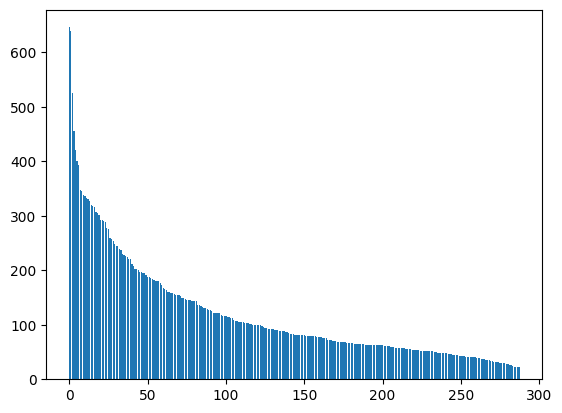

In [10]:
plt.bar(topic_nums, topic_sizes)

### Metrics

In [11]:
topics = topics_words[:, :30]
topics

array([['consciousness', 'conscious', 'brains', ..., 'what', 'argued',
        'intelligent'],
       ['survey', 'overview', 'review', ..., 'categorizing',
        'directions', 'breakthroughs'],
       ['governance', 'ethical', 'accountability', ..., 'participatory',
        'oversight', 'policymakers'],
       ...,
       ['humor', 'headlines', 'edited', ..., 'hindi', 'reid', 'artists'],
       ['fingerprint', 'fingerprints', 'biometric', ..., 'protection',
        'identity', 'localize'],
       ['mtl', 'vsr', 'tsc', ..., 'ignores', 'dnnf', 'tokenizer']],
      dtype='<U15')

In [12]:
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

In [22]:
model = Top2Vec.load('unprocess_doc2vec')

In [13]:
model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

34427
34427


In [14]:
model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.736301952669944
NPMI: 0.06626595564213907
C_V: 0.6158134225247761
Topic Diversity: 0.6461805555555555
Inverted RBO: 0.9978366523483341
Pairwise Jaccard: 0.002146505346814698
KL Uniform: 3.314562654172663
KL Vacuous: 2.9158594172365375
KL Background: 0.018576207296858865


## Top2Vec with Doc2Vec for embeddings [Processed data]

In [1]:
def custom_tokenizer(text):
    return text.split(' ')

In [6]:
summaries = data['Processed Summary'].apply(lambda x: ' '.join(x)).tolist()
model = Top2Vec(summaries, tokenizer=custom_tokenizer, embedding_model='doc2vec')

2024-11-20 21:31:36,712 - top2vec - INFO - Pre-processing documents for training
2024-11-20 21:31:37,363 - top2vec - INFO - Creating joint document/word embedding
2024-11-20 21:36:35,968 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-20 21:37:06,341 - top2vec - INFO - Finding dense areas of documents
2024-11-20 21:37:08,455 - top2vec - INFO - Finding topics


In [13]:
model.save('test')

### Results exploration
Having data and model trained, we can explore the results. Let's check the number of topics and the number of documents in each topic.

In [7]:
model.get_num_topics()

329

In [8]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([592, 587, 526, 449, 413, 404, 385, 369, 361, 361, 361, 352, 343,
       341, 341, 322, 308, 307, 304, 301, 294, 289, 277, 275, 264, 264,
       260, 259, 248, 247, 242, 229, 226, 221, 220, 217, 217, 210, 210,
       210, 209, 205, 205, 201, 195, 190, 188, 188, 177, 174, 164, 164,
       163, 160, 159, 158, 157, 154, 153, 152, 152, 151, 151, 148, 148,
       145, 141, 139, 138, 137, 135, 134, 134, 132, 131, 130, 128, 126,
       126, 125, 124, 123, 122, 122, 121, 121, 121, 119, 119, 117, 115,
       113, 110, 110, 110, 110, 109, 109, 109, 108, 108, 106, 106, 105,
       104, 104, 104, 103, 103, 102, 101, 100, 100, 100,  99,  99,  99,
        99,  99,  98,  97,  97,  96,  95,  95,  92,  90,  90,  90,  89,
        89,  88,  88,  87,  86,  86,  86,  85,  84,  84,  84,  83,  83,
        83,  82,  81,  80,  80,  79,  77,  77,  77,  76,  76,  75,  75,
        74,  74,  74,  73,  73,  72,  71,  70,  70,  70,  70,  70,  69,
        68,  68,  68,  67,  67,  67,  67,  67,  67,  66,  65,  6

In [9]:
topics_words, _, _ = model.get_topics()
topics_words

array([['survey', 'overview', 'review', ..., 'discipline', 'trend',
        'technical'],
       ['consciousness', 'conscious', 'turing', ..., 'universe',
        'creativity', 'briefly'],
       ['pruning', 'accelerator', 'quantization', ..., 'dnns',
        'imagenet', 'snn'],
       ...,
       ['fm', 'federated', 'gai', ..., 'sector', 'alphago', 'slms'],
       ['lvlms', 'hallucination', 'factuality', ..., 'mrc', 'fluent',
        'proficiency'],
       ['tm', 'clause', 'automaton', ..., 'viability', 'interpreting',
        'philosophical']], dtype='<U17')

<BarContainer object of 329 artists>

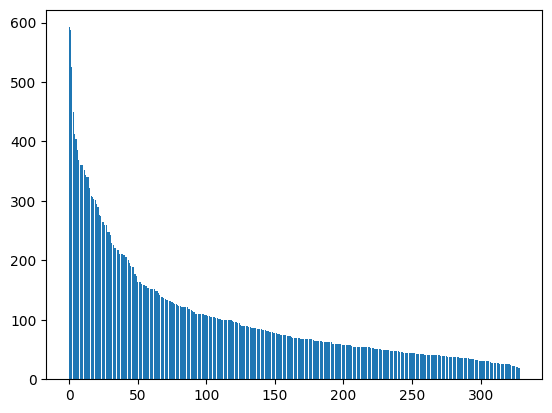

In [10]:
plt.bar(topic_nums, topic_sizes)

### Metrics

In [11]:
topics = topics_words[:, :30]
topics

array([['survey', 'overview', 'review', ..., 'ai', 'foundational',
        'reviewed'],
       ['consciousness', 'conscious', 'turing', ..., 'biological',
        'biology', 'thinking'],
       ['pruning', 'accelerator', 'quantization', ..., 'prune',
        'throughput', 'overhead'],
       ...,
       ['fm', 'federated', 'gai', ..., 'surge', 'revolutionized',
        'tremendous'],
       ['lvlms', 'hallucination', 'factuality', ..., 'premise',
        'responding', 'argumentative'],
       ['tm', 'clause', 'automaton', ..., 'accomplish', 'vote',
        'interpreter']], dtype='<U17')

In [12]:
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

In [14]:
model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

In [19]:
model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.044961188534626
NPMI: 0.08995061046612617
C_V: 0.6484357584491365
Topic Diversity: 0.5635258358662614
Inverted RBO: 0.9970947648661063
Pairwise Jaccard: 0.0028133797389110027
KL Uniform: 3.406733303614284
KL Vacuous: 2.9195032574794832
KL Background: 0.01786382096668742


### Including n-grams in vocabulary

In [15]:
summaries = data['Processed Summary'].apply(lambda x: ' '.join(x)).tolist()
model = Top2Vec(summaries, embedding_model='doc2vec', ngram_vocab=True, ngram_vocab_args={'connector_words': phrases.ENGLISH_CONNECTOR_WORDS})

2024-11-20 21:53:20,901 - top2vec - INFO - Pre-processing documents for training
2024-11-20 21:53:28,566 - top2vec - INFO - Creating joint document/word embedding
2024-11-20 21:58:59,948 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-20 21:59:08,970 - top2vec - INFO - Finding dense areas of documents
2024-11-20 21:59:10,904 - top2vec - INFO - Finding topics


In [23]:
model.save('processed_doc2vec_ngram_vocab')

### Results exploration

In [16]:
model.get_num_topics()

326

Number of topics is similar

In [17]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([613, 504, 484, 461, 449, 441, 406, 367, 364, 352, 348, 346, 337,
       303, 297, 288, 286, 283, 282, 279, 278, 278, 266, 262, 256, 254,
       253, 245, 244, 243, 230, 228, 227, 214, 214, 211, 211, 210, 207,
       203, 202, 191, 186, 185, 184, 181, 177, 169, 169, 169, 165, 164,
       164, 163, 161, 161, 160, 158, 157, 157, 156, 154, 153, 153, 153,
       152, 152, 152, 149, 148, 147, 145, 142, 142, 141, 141, 140, 140,
       139, 138, 137, 135, 135, 134, 133, 132, 132, 131, 128, 128, 126,
       126, 125, 124, 123, 122, 121, 120, 118, 118, 117, 114, 113, 110,
       110, 109, 109, 109, 109, 109, 108, 105, 103, 102, 102, 101, 101,
       101,  99,  99,  99,  99,  98,  97,  97,  96,  95,  94,  93,  92,
        92,  91,  89,  89,  88,  87,  87,  86,  86,  85,  85,  83,  83,
        82,  82,  81,  81,  81,  81,  79,  79,  78,  78,  77,  77,  76,
        76,  76,  76,  75,  75,  74,  74,  74,  74,  73,  73,  72,  72,
        72,  72,  71,  71,  71,  70,  69,  69,  68,  68,  68,  6

In [18]:
topics_words, _, _ = model.get_topics()
topics_words

array([['comprehensive survey', 'survey', 'survey review', ...,
        'offer insight', 'present comprehensive', 'survey delf'],
       ['quantization', 'pruning', 'accelerator', ...,
        'substantial reduction', 'negligible overhead',
        'structured pruning'],
       ['gnns', 'graph', 'node', ..., 'spectral', 'subgraph pattern',
        'node attribute'],
       ...,
       ['cr', 'mechanical turk', 'increasing prevalence', ...,
        'expectation maximization', 'auc maximization',
        'recommendation system'],
       ['lvlms', 'one simplest', 'even simplest', ..., 'creative arc',
        'critically assess', 'logically consistent'],
       ['aigc', 'content aigc', 'aigc detector', ..., 'chatgpt',
        'understudied area', 'survey aim']], dtype='<U29')

But now we see that some of topics words are digrams e.g. "health care"

<BarContainer object of 326 artists>

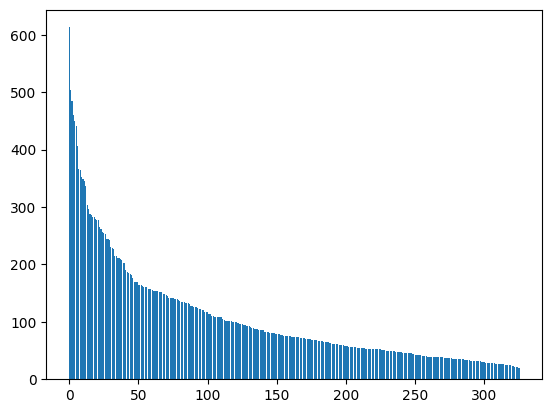

In [19]:
plt.bar(topic_nums, topic_sizes)

### Load model

In [45]:
model = Top2Vec.load('processed_doc2vec_ngram_vocab')

### Metrics

In [46]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: None
NPMI: None
C_V: None
Topic Diversity: 0.9030674846625767
Inverted RBO: 0.9995963395798348
Pairwise Jaccard: 0.0003946365350702053
KL Uniform: 3.40184697494933
KL Vacuous: 2.920121909240558
KL Background: 0.013488917807712759


## Top2Vec with Doc2Vec for embeddings [Unprocessed data]

In [24]:
summaries = data['Summary'].tolist()
model = Top2Vec(summaries, embedding_model='doc2vec', ngram_vocab=True, ngram_vocab_args={'connector_words': phrases.ENGLISH_CONNECTOR_WORDS})

2024-11-20 22:01:37,799 - top2vec - INFO - Pre-processing documents for training
2024-11-20 22:01:48,877 - top2vec - INFO - Creating joint document/word embedding
2024-11-20 22:11:39,208 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-20 22:11:47,284 - top2vec - INFO - Finding dense areas of documents
2024-11-20 22:11:49,151 - top2vec - INFO - Finding topics


In [25]:
model.save('unprocessed_doc2vec_ngram_vocab')

### Results exploration

In [26]:
model.get_num_topics()

271

In [27]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([684, 652, 633, 536, 454, 444, 411, 393, 375, 370, 359, 354, 348,
       346, 343, 340, 330, 327, 317, 316, 311, 288, 287, 285, 285, 277,
       276, 271, 268, 267, 266, 256, 249, 245, 242, 242, 239, 239, 232,
       227, 224, 223, 223, 221, 220, 219, 215, 208, 207, 207, 202, 201,
       195, 187, 184, 184, 183, 178, 178, 176, 176, 172, 172, 172, 164,
       162, 161, 161, 161, 160, 158, 154, 154, 152, 147, 145, 142, 142,
       140, 138, 138, 137, 136, 136, 135, 133, 132, 131, 130, 130, 128,
       127, 125, 124, 123, 122, 122, 120, 118, 115, 115, 114, 114, 111,
       109, 109, 108, 108, 107, 106, 106, 105, 105, 103, 103, 102, 101,
        99,  99,  98,  97,  96,  96,  96,  95,  95,  95,  92,  92,  92,
        90,  90,  89,  88,  88,  88,  86,  86,  86,  86,  86,  84,  84,
        83,  82,  81,  80,  80,  80,  79,  78,  78,  77,  76,  76,  75,
        74,  74,  74,  73,  73,  72,  72,  71,  70,  70,  69,  69,  69,
        69,  69,  68,  68,  68,  67,  67,  67,  67,  66,  66,  6

In [28]:
topics_words, _, _ = model.get_topics()
topics_words

array([['artificial general', 'consciousness', 'general intelligence',
        ..., 'what they', 'cognitive neuroscience', 'cognition'],
       ['ethics', 'ethical', 'ethical principles', ..., 'about what',
        'regulatory compliance', 'justice'],
       ['comprehensive overview', 'comprehensive survey',
        'detailed overview', ..., 'advances in the field',
        'future developments', 'opportunities and challenges'],
       ...,
       ['fire', 'fire detection', 'fire lif', ..., 'allow us',
        'web crawled', 'web browsing'],
       ['cbr', 'reasoning cbr', 'indivisible goods', ...,
        'make decisions', 'twin', 'effectively leverage'],
       ['mtl', 'learning mtl', 'gating mechanism', ...,
        'spurious correlation', 'greatly improved', 'leading cause']],
      dtype='<U33')

<BarContainer object of 271 artists>

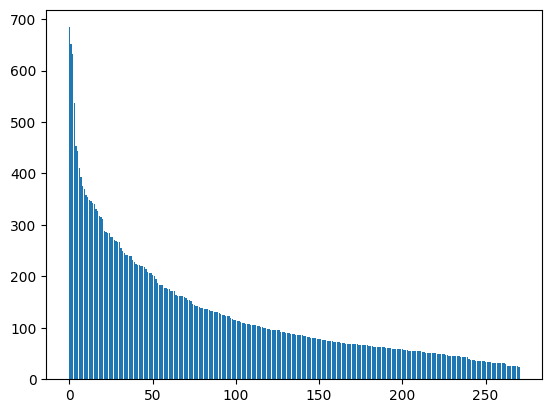

In [29]:
plt.bar(topic_nums, topic_sizes)

In my opinion the topics top words are much more understandable when using unprocessed data with Doc2Vec and n-grams in vocabulary.

### Load model

In [43]:
model = Top2Vec.load('unprocessed_doc2vec_ngram_vocab')

### Metrics

In [44]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: None
NPMI: None
C_V: None
Topic Diversity: 0.9431734317343173
Inverted RBO: 0.9997421875216578
Pairwise Jaccard: 0.0002561330528433726
KL Uniform: 3.3018714834090885
KL Vacuous: 2.9212672892298506
KL Background: 0.017906298924703152


# Top2Vec with allenai-specter for embeddings

In [50]:
allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
embedding_model = allenai_specter.encode

In [51]:
summaries = data['Summary'].tolist()
model = Top2Vec(summaries, embedding_model=embedding_model, ngram_vocab=True, ngram_vocab_args={'connector_words': phrases.ENGLISH_CONNECTOR_WORDS})

2024-11-19 21:20:26,618 - top2vec - INFO - Pre-processing documents for training
/home/mstrzezon/tools/miniconda3/envs/adm/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-11-19 21:20:47,820 - top2vec - INFO - Creating joint document/word embedding
2024-11-19 21:48:23,670 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-19 21:48:33,963 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to 

### Results exploration

In [52]:
model.get_num_topics()

50

In [53]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([12425,  1459,  1264,  1077,  1039,  1030,   990,   925,   902,
         823,   721,   712,   695,   610,   581,   511,   501,   495,
         470,   409,   398,   396,   394,   382,   375,   371,   353,
         342,   312,   284,   283,   264,   233,   232,   209,   203,
         185,   165,   164,   138,   135,   132,   128,   122,   121,
         120,    98,    87,    87,    75])

In [54]:
topics_words, _, _ = model.get_topics()
topics_words

array([['prune the search', 'amount of annotated',
        'validates the effectiveness', ...,
        'motivated by the observation', 'finding the best',
        'due to the scarcity'],
       ['stackelberg game', 'player zero', 'game tree', ...,
        'two player', 'game', 'playing agents'],
       ['urban flow', 'urban road', 'urban mobility', ..., 'road',
        'explore the feasibility', 'timeline based'],
       ...,
       ['skin cancer', 'skin lesion', 'skin lesions', ...,
        'state of the art', 'image super', 'cifar and imagenet'],
       ['homomorphic encryption', 'encrypted traffic', 'secret dnn', ...,
        'computational overhead', 'adversarial attack',
        'reverse engineering'],
       ['materials science', 'material science', 'material properties',
        ..., 'inspired by the success', 'none of the existing',
        'select the appropriate']], dtype='<U31')

<BarContainer object of 50 artists>

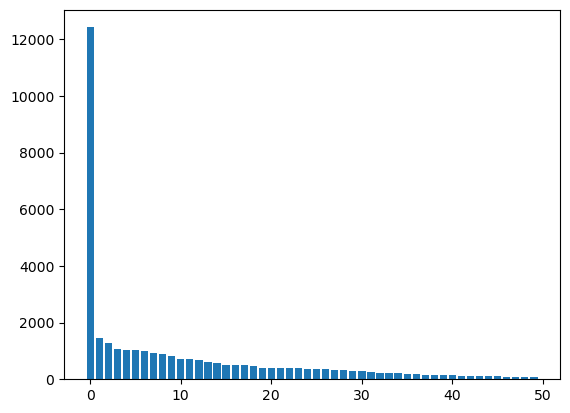

In [55]:
plt.bar(topic_nums, topic_sizes)

#### Save the model

In [62]:
allenai_specter.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/allenai_specter")

In [57]:
model.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_unprocessed")

### Load data

In [41]:
model = Top2Vec.load("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_unprocessed")

### Metrics

In [42]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: None
NPMI: None
C_V: None
Topic Diversity: 0.916
Inverted RBO: 0.9972305456451195
Pairwise Jaccard: 0.0023452889927900993
KL Uniform: 2.4942272109904517
KL Vacuous: 2.775041251919152
KL Background: 0.011003335794500007


### Processed data

In [63]:
allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
embedding_model = allenai_specter.encode

In [64]:
summaries = data['Processed Summary'].apply(lambda x: ' '.join(x)).tolist()
model = Top2Vec(summaries, embedding_model=embedding_model, ngram_vocab=True, ngram_vocab_args={'connector_words': phrases.ENGLISH_CONNECTOR_WORDS})

2024-11-19 22:13:02,956 - top2vec - INFO - Pre-processing documents for training
/home/mstrzezon/tools/miniconda3/envs/adm/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-11-19 22:13:18,895 - top2vec - INFO - Creating joint document/word embedding
2024-11-19 22:27:15,661 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-19 22:27:26,190 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to 

In [65]:
model.get_num_topics()

20

In [66]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [72]:
topics_words, _, _ = model.get_topics()
topics_words

array([['overcoming challenge', 'framework named', 'framework called',
        'prune search', 'non deterministic', 'understanding nlu',
        'address shortcoming', 'existing', 'rich semantic',
        'comprehensive experiment', 'guide future', 'experiment show',
        'enrich', 'tree ast', 'architecture search', 'many discipline',
        'experiment validate', 'amr parsing', 'partially overlapping',
        'parse', 'deploy', 'headline generation', 'lack comprehensive',
        'result show', 'steiner tree', 'inspired recent',
        'demonstrates effectiveness', 'research contributes',
        'work pave', 'paper investigate', 'conclude survey', 'proposed',
        'proposing', 'overcome shortcoming', 'extensive experiment',
        'addressing challenge', 'provide comprehensive',
        'outperform existing', 'thoroughly investigate', 'professional',
        'capturing complex', 'mining', 'modify', 'winograd schema',
        'paper propose', 'analysis sna', 'make full',
   

<BarContainer object of 20 artists>

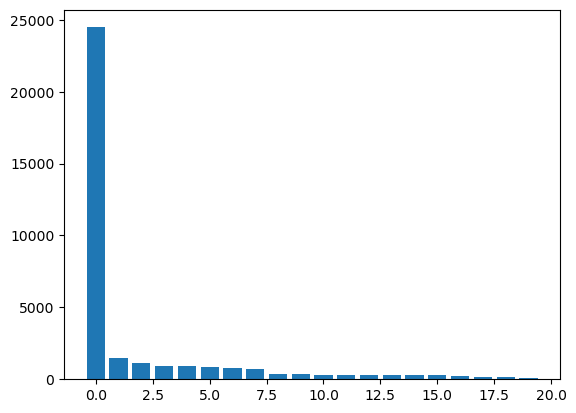

In [68]:
plt.bar(topic_nums, topic_sizes)

In [69]:
allenai_specter.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/allenai_specter_processed")

In [70]:
model.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_processed")

In [71]:
# save vectors as pkl
document_embeddings = model.document_vectors
import pickle
with open("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/allenai_specter_processed_vectors.pkl", "wb") as f:
    pickle.dump(document_embeddings, f)

### Load data   

In [39]:
model = Top2Vec.load("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_processed")

### Metrics

In [40]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: None
NPMI: None
C_V: None
Topic Diversity: 0.94
Inverted RBO: 0.994864040183421
Pairwise Jaccard: 0.0045244690674053544
KL Uniform: 2.3362589337089084
KL Vacuous: 2.6849870463734202
KL Background: 0.006518839495958927


## Model without n-grams + processed

In [73]:
allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
embedding_model = allenai_specter.encode

In [74]:
summaries = data['Processed Summary'].apply(lambda x: ' '.join(x)).tolist()
model = Top2Vec(summaries, embedding_model=embedding_model)

2024-11-19 22:32:14,446 - top2vec - INFO - Pre-processing documents for training
/home/mstrzezon/tools/miniconda3/envs/adm/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-11-19 22:32:21,329 - top2vec - INFO - Creating joint document/word embedding
2024-11-19 22:46:01,276 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-19 22:46:10,095 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to 

In [75]:
model.get_num_topics()

22

In [79]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_sizes

array([24074,  1086,   983,   959,   953,   940,   848,   710,   383,
         377,   326,   319,   300,   296,   292,   286,   285,   283,
         259,   185,   179,   104])

In [78]:
topics_words, _, _ = model.get_topics()
topics_words

array([['existing', 'enrich', 'parse', ..., 'encode', 'curse',
        'completed'],
       ['forest', 'agriculture', 'agricultural', ..., 'proposed',
        'overfit', 'deep'],
       ['deploying', 'deployment', 'deploy', ..., 'dedicated',
        'traversal', 'devise'],
       ...,
       ['blockchain', 'chaining', 'security', ..., 'demonstrating',
        'identified', 'big'],
       ['quantum', 'encode', 'encoding', ..., 'par', 'tried',
        'synthesize'],
       ['food', 'composition', 'recipe', ..., 'whole', 'notoriously',
        'big']], dtype='<U15')

<BarContainer object of 22 artists>

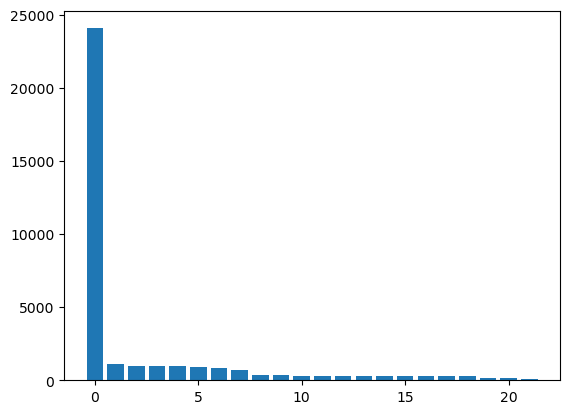

In [80]:
plt.bar(topic_nums, topic_sizes)

In [81]:
allenai_specter.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/allenai_specter_processed_without_ngrams")

In [82]:
model.save("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_processed_without_ngrams")

In [83]:
# save vectors as pkl
document_embeddings = model.document_vectors
import pickle
with open("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/allenai_specter_processed_without_ngrams_vectors.pkl", "wb") as f:
    pickle.dump(document_embeddings, f)

### Load data

In [36]:
model = Top2Vec.load("/home/mstrzezon/university/AdvancedDataMining/Arxiv-Topic-Trend-Analysis/src/top2vec/top2vec_allenai_specter_processed_without_ngrams")

### Metrics

In [38]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: -9.084943766438005
NPMI: -0.15882488859264465
C_V: 0.3559652591268936
Topic Diversity: 0.8454545454545455
Inverted RBO: 0.9876422566343538
Pairwise Jaccard: 0.010514998131097204
KL Uniform: 2.332462646724588
KL Vacuous: 2.7057906196873898
KL Background: 0.006178578873867322


### Model without n-grams + unprocessed

In [47]:
allenai_specter = SentenceTransformer('sentence-transformers/allenai-specter')
embedding_model = allenai_specter.encode

In [48]:
summaries = data['Summary'].tolist()
model = Top2Vec(summaries, embedding_model=embedding_model)

2024-11-20 22:28:28,675 - top2vec - INFO - Pre-processing documents for training
/home/mstrzezon/tools/miniconda3/envs/octis/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-11-20 22:28:42,897 - top2vec - INFO - Creating joint document/word embedding
2024-11-20 22:56:27,642 - top2vec - INFO - Creating lower dimension embedding of documents
2024-11-20 22:56:36,031 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to

In [49]:
model.save('allenai_specter_unprocessed_without_ngrams')

In [50]:
topics_words, _, _ = model.get_topics()
topics = topics_words[:, :30]
topic_vectors = model.topic_vectors
document_vectors = model.document_vectors

model_output = get_topvec_model_output(data, model.doc_top, topics, topic_vectors, document_vectors)

model_metrics = calculate_metrics(model_output, dataset, verbose=True)

UMass: -8.343837184120618
NPMI: -0.12545965495273148
C_V: 0.38107238501244106
Topic Diversity: 0.7196078431372549
Inverted RBO: 0.9874426418783081
Pairwise Jaccard: 0.010183210962668237
KL Uniform: 2.5063591461453325
KL Vacuous: 2.800274499735012
KL Background: 0.010968417443755044
